In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
import pandas as pd
df = pd.read_sas('hurricane.sas7bdat',format='sas7bdat')



In [2]:
df.head()

,backup,age,bridgecrane,servo,gear,trashrack,slope,elevation,h1,h2,...,h43,h44,h45,h46,h47,h48,survive,hour,reason,reason2
0,0.0,6.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,48.0,0.0,5.0
1,0.0,6.0,1.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,48.0,0.0,5.0
2,0.0,6.1,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,0.0,5.0
3,1.0,6.1,1.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,0.0,5.0
4,0.0,6.2,1.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,0.0,5.0


# EDA

In [58]:
df.info() #no missing values except for h1-h48

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 60 columns):
backup         770 non-null float64
age            770 non-null float64
bridgecrane    770 non-null float64
servo          770 non-null float64
gear           770 non-null float64
trashrack      770 non-null float64
slope          770 non-null float64
elevation      770 non-null float64
h1             770 non-null float64
h2             768 non-null float64
h3             766 non-null float64
h4             764 non-null float64
h5             762 non-null float64
h6             760 non-null float64
h7             758 non-null float64
h8             757 non-null float64
h9             748 non-null float64
h10            743 non-null float64
h11            741 non-null float64
h12            739 non-null float64
h13            736 non-null float64
h14            734 non-null float64
h15            729 non-null float64
h16            726 non-null float64
h17            721 non-null flo

In [3]:
#numeric variables EDA
df.describe()

,backup,age,bridgecrane,servo,gear,trashrack,slope,elevation,h1,h2,...,h43,h44,h45,h46,h47,h48,survive,hour,reason,reason2
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,768.000000,...,618.000000,610.000000,608.000000,604.000000,598.000000,597.000000,770.000000,770.000000,770.000000,770.000000
mean,0.493506,7.226753,0.870130,0.596104,0.129870,0.516883,3.149351,3.388312,0.148052,0.278646,...,0.522654,0.524590,0.524671,0.529801,0.541806,0.534338,0.410390,38.520779,1.475325,3.527273
std,0.500283,1.026241,0.336379,0.490996,0.336379,0.500040,2.998444,0.849458,0.355382,0.448625,...,0.499891,0.499805,0.499802,0.499525,0.498666,0.499238,0.492224,12.891170,1.505098,1.503324
min,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,6.500000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,2.000000
50%,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,45.000000,1.000000,4.000000
75%,1.000000,7.800000,1.000000,1.000000,0.000000,1.000000,4.000000,4.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000,3.000000,5.000000
max,1.000000,10.400000,1.000000,1.000000,1.000000,1.000000,18.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000,4.000000,5.000000


In [106]:
display(df['hour'].describe(),df['survive'].value_counts())#Targets 


count    770.000000
mean      38.520779
std       12.891170
min        1.000000
25%       27.000000
50%       45.000000
75%       48.000000
max       48.000000
Name: hour, dtype: float64

0.0    454
1.0    316
Name: survive, dtype: int64

<p> Percentage of pumps that survived the hurricane: 41%</p>

In [116]:
#Percentage of pumps in each type of failure 

per=pd.DataFrame(df.groupby('reason').survive.count())
per.apply(lambda x: x / (x.sum()))
          
#df.groupby('reason').survive.count().apply(lambda x:100 * x / (x.sum()))

,survive
reason,
0.0,0.410390
1.0,0.149351
2.0,0.145455
3.0,0.144156
4.0,0.150649


In [22]:
#and average failure time for each failure type
df.groupby('reason').hour.mean()

reason
0.0    48.000000
1.0    26.443478
2.0    41.044643
3.0    38.828829
4.0    21.939655
Name: hour, dtype: float64

In [48]:
#convert the above to dataframe for anova
anova=df.loc[:,('reason', 'hour')]

In [54]:
anova=anova.loc[anova['reason']>0,:] #subset to only failed ones 


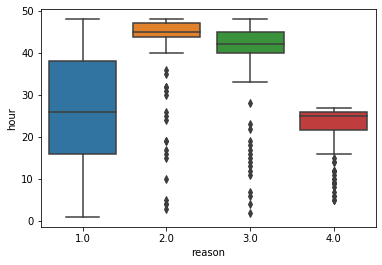

In [55]:
sns.boxplot(x='reason', y='hour', data=anova)



In [56]:
anova

,reason,hour
316,1.0,37.0
317,1.0,33.0
318,1.0,28.0
319,1.0,10.0
320,1.0,26.0
...,...,...
765,4.0,26.0
766,4.0,26.0
767,4.0,24.0
768,4.0,26.0


In [57]:
from scipy import stats
import statsmodels.formula.api as smf


In [60]:
model=smf.ols(formula='hour ~ reason', data=anova)

In [61]:
result=model.fit()
result.summary()  #F: 8.494, p: 0.003

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hour   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.494
Date:                Sat, 02 Nov 2019   Prob (F-statistic):            0.00374
Time:                        12:51:17   Log-Likelihood:                -1812.9
No. Observations:                 454   AIC:                             3630.
Df Residuals:                     452   BIC:                             3638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9205      1.504     23.882      0.000      32.965      38.876
reason        -1.5976      0.548     -2.914      0.004      -2.675      -0.520
==============================================================================
Omnibus:                       54.679   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.663
Skew:                          -0.590   Prob(JB):                     6.63e-09
Kurtosis:                       2.225   Cond. No.                         7.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot survival prob

In [11]:
#pip install lifelines

In [64]:
from lifelines import KaplanMeierFitter


In [65]:
## create a kmf object
kmf = KaplanMeierFitter() 


In [6]:
df.loc[:,('hour','survive')].tail(50)


#might need to reverse code survive
df['survive']=(df['survive']==0).astype(int)

In [7]:
#opitional
durations = np.array(df['hour'])
event_observed = np.array(df['survive'])



Text(0, 0.5, 'Probability')

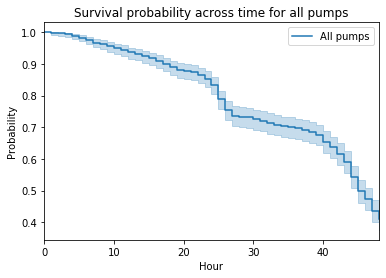

In [168]:
## Fit the data into the model
kmf.fit(durations,event_observed,label='All pumps')

## Create an estimate
kmf.plot() ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.title('Survival probability across time for all pumps')
plt.xlabel('Hour')
plt.ylabel('Probability')

In [8]:
#plot between groups
## four reasons are compared. 
groups= df['reason']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)      ## group i1 , having the pandas series  for the 1st cohort
i4 = (groups == 4) 




Text(0, 0.5, 'Probability')

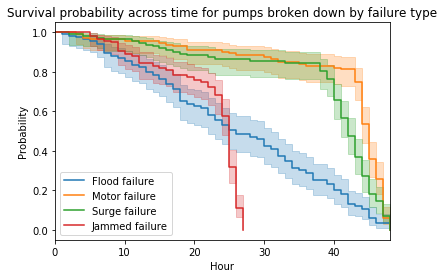

In [183]:
kmf.fit(durations[i1], event_observed[i1], label='Flood failure')
a1=kmf.plot()

kmf.fit(durations[i2], event_observed[i2], label='Motor failure')
a2=kmf.plot(ax=a1)

kmf.fit(durations[i3], event_observed[i3], label='Surge failure')
a3=kmf.plot(ax=a2)

kmf.fit(durations[i4], event_observed[i4], label='Jammed failure')
a4=kmf.plot(ax=a3)


plt.title('Survival probability across time for pumps broken down by failure type')
plt.xlabel('Hour')
plt.ylabel('Probability')

# plot hazard probability 

In [12]:
from lifelines import CoxPHFitter

In [13]:

from lifelines import NelsonAalenFitter

In [96]:
# durations = np.array(df['hour'])
# event_observed = np.array(df['survive'])

naf = NelsonAalenFitter()

naf.fit(durations,event_observed=event_observed)

<lifelines.NelsonAalenFitter: fitted with 770 total observations, 316 right-censored observations>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.001299
2.0          0.003901
3.0          0.006510
4.0          0.011749
5.0          0.017016
6.0          0.023639
7.0          0.032985
8.0          0.037017
9.0          0.045130


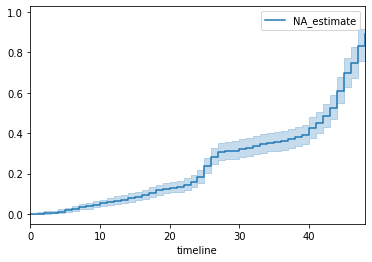

In [123]:
print(naf.cumulative_hazard_.head())  #cumulative hazard prob.....?
naf.plot() 

In [132]:
cumu=pd.DataFrame(naf.cumulative_hazard_)
cumu_differ=cumu.diff().fillna(0)
cumu_differ=cumu_differ.rename(columns={"NA_estimate": "Cnditional probability"})
cumu_differ#conditional probability?

,Cnditional probability
timeline,
0.0,0.000000
1.0,0.001299
2.0,0.002602
3.0,0.002609
4.0,0.005239
5.0,0.005267
6.0,0.006623
7.0,0.009346
8.0,0.004032


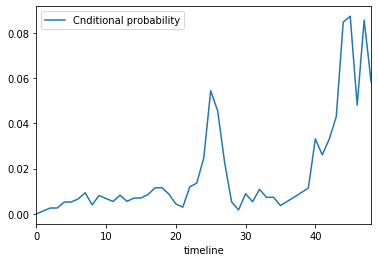

In [133]:
cumu_differ.plot()

##  Conditional failure probabilities across time for pumps broken down by failure type

In [139]:
#flood pump 

naf_f=naf.fit(durations[i1], event_observed[i1], label='Flood failure')
naf_f.cumulative_hazard_


,Flood failure
timeline,
0.0,0.000000
1.0,0.008696
2.0,0.017468
3.0,0.026317
4.0,0.035246
5.0,0.044255
6.0,0.062520
7.0,0.109698
8.0,0.129211


In [137]:
#take the difference
cumu_f=pd.DataFrame(naf_f.cumulative_hazard_)
cumuf_differ=cumu_f.diff().fillna(0)
cumuf_differ=cumuf_differ.rename(columns={"NA_estimate": "Conditional probability"})
cumuf_differ   # the gap at 46 and 48

,Flood failure
timeline,
0.0,0.000000
1.0,0.008696
2.0,0.008772
3.0,0.008850
4.0,0.008929
5.0,0.009009
6.0,0.018265
7.0,0.047178
8.0,0.019513


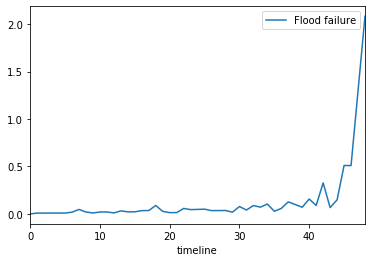

In [138]:
cumuf_differ.plot()

Text(0, 0.5, 'Conditional failure probabilities')

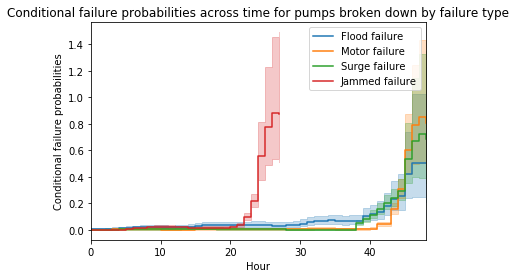

In [95]:
bandwidth = 4.
naf.fit(durations[i1], event_observed[i1], label='Flood failure')
a1 = naf.plot_hazard(bandwidth=bandwidth)
naf.fit(durations[i2], event_observed[i2], label='Motor failure')
a2= naf.plot_hazard(ax=a1,bandwidth=bandwidth)
naf.fit(durations[i3], event_observed[i3], label='Surge failure')
a3= naf.plot_hazard(ax=a2, bandwidth=bandwidth)
naf.fit(durations[i4], event_observed[i4], label='Jammed failure')
a4= naf.plot_hazard(ax=a3, bandwidth=bandwidth)


plt.title('Conditional failure probabilities across time for pumps broken down by failure type')
plt.xlabel('Hour')
plt.ylabel('Conditional failure probabilities')

## Cumulative hazard function across time for pumps broken down by failure type

Text(0, 0.5, 'Cumulative hazard')

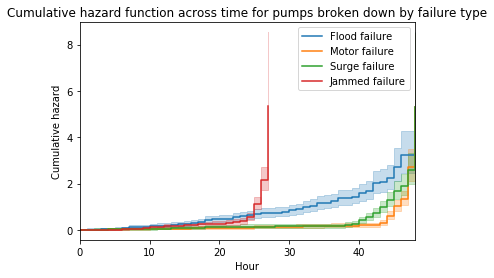

In [69]:
naf.fit(durations[i1], event_observed[i1], label='Flood failure')
a1=naf.plot()
naf.fit(durations[i2], event_observed[i2], label='Motor failure')
a2=naf.plot(ax=a1)

naf.fit(durations[i3], event_observed[i3], label='Surge failure')
a3=naf.plot(ax=a2)

naf.fit(durations[i4], event_observed[i4], label='Jammed failure')
a4=naf.plot(ax=a3)



plt.title('Cumulative hazard function across time for pumps broken down by failure type')
plt.xlabel('Hour')
plt.ylabel('Cumulative hazard')

# Statistical test on survival probabilities across time

In [187]:
from lifelines.statistics import multivariate_logrank_test



In [291]:
level_map = {1: 'Water-based', 3: 'Water-based',
             2: 'Mechanical', 4: 'Mechanical', 
             0: 'Not failed'}

df['new_levels'] = df['reason'].apply(lambda x: level_map[x])

In [293]:

del df['failuregroups'],df['failure groups']
df.head()

,backup,age,bridgecrane,servo,gear,trashrack,slope,elevation,h1,h2,...,h44,h45,h46,h47,h48,survive,hour,reason,reason2,new_levels
0,0.0,6.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0,48.0,0.0,5.0,Not failed
1,0.0,6.0,1.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0,48.0,0.0,5.0,Not failed
2,0.0,6.1,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,48.0,0.0,5.0,Not failed
3,1.0,6.1,1.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,48.0,0.0,5.0,Not failed
4,0.0,6.2,1.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,48.0,0.0,5.0,Not failed


In [294]:


results = multivariate_logrank_test(df['hour'], df['new_levels'], df['survive'])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2

---
 test_statistic      p  -log2(p)
         798.18 <0.005    575.76


In [102]:
a=[1, 2, 3, 4] 
[i for i in a if i >2]

[3, 4]